In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [103]:
heat_trainner = pd.read_csv("P:/CD1/HEAT PROJECT/heat_trainer.csv")
# printing the first 5 rows of dataset
heat_trainner.head()

,StudyID,A_Date,Diagnosis__Admitting,DX1,DX2,DX3,DX4,Disposition_Status,heat_group,heat_syn_cramps,...,POSITION,ADMITTING_heat,LOS,AGE_GROUP,heat_stroke,RHABDO,AGE_4_GROUP,AGE_6_GROUP,LOS_3_GROUP,STATE
0,CH000357,1/27/2016,NaN,M6282,E8342,R748,Z87891,1,5.0,NaN,...,1,7,2,1,0,1,1,2,2,19
1,CH006327,6/3/2015,NaN,486,7904,2768,27652,1,NaN,NaN,...,2,7,3,3,0,0,4,5,4,19
2,CH003029,5/14/2016,NaN,M6282,N179,E860,R740,1,5.0,NaN,...,1,7,2,1,0,1,1,1,4,19
3,CH002437,9/17/2014,NaN,25541,2761,2767,4589,1,NaN,NaN,...,1,7,2,2,0,0,3,4,3,19
4,CH006972,1/20/2016,NaN,M6282,N179,N141,T50995A,1,5.0,NaN,...,2,7,2,3,0,1,3,4,4,19


In [104]:
#find total observations in dataset
len(heat_trainner.index)

7255

In [105]:
# getting the columns of the dataset
columns = list(heat_trainner.columns)
columns

['StudyID',
 'A_Date',
 'Diagnosis__Admitting',
 'DX1',
 'DX2',
 'DX3',
 'DX4',
 'Disposition_Status',
 'heat_group',
 'heat_syn_cramps',
 'heat_exh',
 'heat_other',
 'HYPONATREMIA',
 'FY',
 'SEX',
 'BRANCH',
 'RACE_CODE',
 'POSITION',
 'ADMITTING_heat',
 'LOS',
 'AGE_GROUP',
 'heat_stroke',
 'RHABDO',
 'AGE_4_GROUP',
 'AGE_6_GROUP',
 'LOS_3_GROUP',
 'STATE']

In [106]:
# check datatype in each column
print("Column datatypes: ")
print(heat_trainner.dtypes)

Column datatypes: 
StudyID                  object
A_Date                   object
Diagnosis__Admitting     object
DX1                      object
DX2                      object
DX3                      object
DX4                      object
Disposition_Status        int64
heat_group              float64
heat_syn_cramps         float64
heat_exh                float64
heat_other              float64
HYPONATREMIA            float64
FY                        int64
SEX                       int64
BRANCH                    int64
RACE_CODE                 int64
POSITION                  int64
ADMITTING_heat            int64
LOS                       int64
AGE_GROUP                 int64
heat_stroke               int64
RHABDO                    int64
AGE_4_GROUP               int64
AGE_6_GROUP               int64
LOS_3_GROUP               int64
STATE                     int64
dtype: object


In [107]:
# names of the columns
columns = ['DX1', 'DX2', 'DX3', 'DX4', 'Diagnosis__Admitting']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    heat_trainner[column] = heat_trainner[column].fillna("")
  

In [108]:
# printing the first 5 rows of dataset
heat_trainner.head()

,StudyID,A_Date,Diagnosis__Admitting,DX1,DX2,DX3,DX4,Disposition_Status,heat_group,heat_syn_cramps,...,POSITION,ADMITTING_heat,LOS,AGE_GROUP,heat_stroke,RHABDO,AGE_4_GROUP,AGE_6_GROUP,LOS_3_GROUP,STATE
0,CH000357,1/27/2016,,M6282,E8342,R748,Z87891,1,5.0,NaN,...,1,7,2,1,0,1,1,2,2,19
1,CH006327,6/3/2015,,486,7904,2768,27652,1,NaN,NaN,...,2,7,3,3,0,0,4,5,4,19
2,CH003029,5/14/2016,,M6282,N179,E860,R740,1,5.0,NaN,...,1,7,2,1,0,1,1,1,4,19
3,CH002437,9/17/2014,,25541,2761,2767,4589,1,NaN,NaN,...,1,7,2,2,0,0,3,4,3,19
4,CH006972,1/20/2016,,M6282,N179,N141,T50995A,1,5.0,NaN,...,2,7,2,3,0,1,3,4,4,19


In [109]:
# names of the columns
columns = ['heat_stroke', 'heat_syn_cramps', 'heat_exh', 'heat_other', 'RHABDO','HYPONATREMIA']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
   heat_trainner[column] = heat_trainner[column].fillna(0)


In [110]:
# printing the first 5 rows of dataset
heat_trainner.head()

,StudyID,A_Date,Diagnosis__Admitting,DX1,DX2,DX3,DX4,Disposition_Status,heat_group,heat_syn_cramps,...,POSITION,ADMITTING_heat,LOS,AGE_GROUP,heat_stroke,RHABDO,AGE_4_GROUP,AGE_6_GROUP,LOS_3_GROUP,STATE
0,CH000357,1/27/2016,,M6282,E8342,R748,Z87891,1,5.0,0.0,...,1,7,2,1,0,1,1,2,2,19
1,CH006327,6/3/2015,,486,7904,2768,27652,1,NaN,0.0,...,2,7,3,3,0,0,4,5,4,19
2,CH003029,5/14/2016,,M6282,N179,E860,R740,1,5.0,0.0,...,1,7,2,1,0,1,1,1,4,19
3,CH002437,9/17/2014,,25541,2761,2767,4589,1,NaN,0.0,...,1,7,2,2,0,0,3,4,3,19
4,CH006972,1/20/2016,,M6282,N179,N141,T50995A,1,5.0,0.0,...,2,7,2,3,0,1,3,4,4,19


In [64]:
#define the predictor variables and the response variable
X = heat_trainner[['AGE_4_GROUP', 'LOS_3_GROUP', 'SEX']]
y = heat_trainner['heat_stroke']
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [65]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [68]:
#create the confusion matrix for the model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2058,    0],
       [ 119,    0]], dtype=int64)

In [ ]:
#true positive predictions: 2058
#true neg prediction: 0
#false positive predictions: 119
# false negative predictions: 0

In [72]:
#get the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9453376205787781


In [73]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

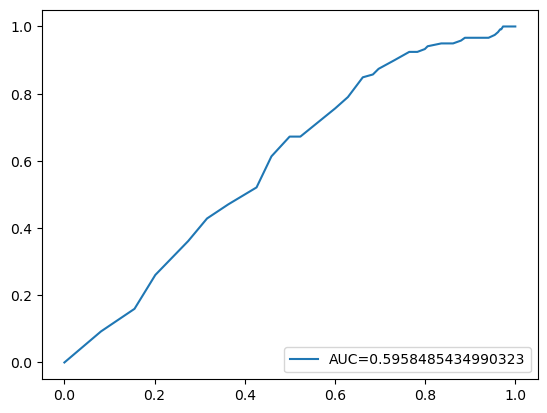

In [74]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [75]:
#define the predictor variables and the response variable
X = heat_trainner[['AGE_6_GROUP', 'LOS_3_GROUP']]
y = heat_trainner['heat_stroke']
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [76]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [77]:
#create the confusion matrix for the model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2058,    0],
       [ 119,    0]], dtype=int64)

In [78]:
#true positive predictions: 2058
#true neg prediction: 0
#false positive predictions: 119
# false negative predictions: 0

In [79]:
#get the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9453376205787781


In [80]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

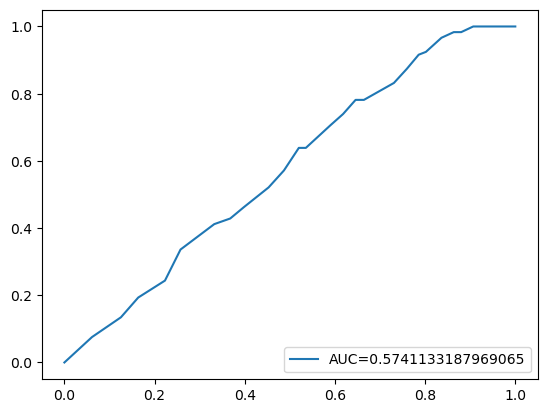

In [81]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [141]:
model = smf.logit("heat_stroke ~ C(SEX) + C(AGE_4_GROUP) + C(LOS_3_GROUP) ", data=heat_trainner)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.228963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            heat_stroke   No. Observations:                 7255
Model:                          Logit   Df Residuals:                     7246
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Aug 2023   Pseudo R-squ.:                 0.03532
Time:                        14:27:32   Log-Likelihood:                -1661.1
converged:                       True   LL-Null:                       -1721.9
Covariance Type:            nonrobust   LLR p-value:                 1.516e-22
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.2968      0.107    -21.453      0.000      -2.507      -2.087
C(SEX)[T.2]            -0.9291      0.193     -4.825      0.000      -1.306      -0.552
C(AGE_4_GROUP)[T.2]    -0.0260      0.134     -0.194      0.846      -0.288       0.236
C(AGE_4_GROUP)[T.3]    -0.0190      0.137     -0.139      0.889      -0.287       0.249
C(AGE_4_GROUP)[T.4]    -0.4992      0.161     -3.100      0.002      -0.815      -0.184
C(AGE_4_GROUP)[T.5]    -0.8015      0.176     -4.567      0.000      -1.145      -0.457
C(LOS_3_GROUP)[T.2]     0.2514      0.113      2.220      0.026       0.029       0.473
C(LOS_3_GROUP)[T.3]    -0.3138      0.137     -2.297      0.022      -0.582      -0.046
C(LOS_3_GROUP)[T.4]    -1.1007      0.223     -4.941      0.000      -1.537      -0.664
=======================================================================================
"""

In [127]:
coefs = pd.DataFrame({'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,-1.367772,0.254674,Intercept
1,-0.025966,0.974368,C(AGE_4_GROUP)[T.2]
2,-0.019033,0.981147,C(AGE_4_GROUP)[T.3]
3,-0.499160,0.607041,C(AGE_4_GROUP)[T.4]
4,-0.801477,0.448666,C(AGE_4_GROUP)[T.5]
5,0.251421,1.285851,C(LOS_3_GROUP)[T.2]
6,-0.313790,0.730673,C(LOS_3_GROUP)[T.3]
7,-1.100677,0.332646,C(LOS_3_GROUP)[T.4]
8,-0.929062,0.394924,SEX


In [138]:
model = smf.logit("heat_stroke ~ C(SEX, Treatment(2)) + C(AGE_4_GROUP, Treatment(3)) + C(LOS_3_GROUP, Treatment(2)) ", data=heat_trainner)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.228963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            heat_stroke   No. Observations:                 7255
Model:                          Logit   Df Residuals:                     7246
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Aug 2023   Pseudo R-squ.:                 0.03532
Time:                        14:26:29   Log-Likelihood:                -1661.1
converged:                       True   LL-Null:                       -1721.9
Covariance Type:            nonrobust   LLR p-value:                 1.516e-22
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.9935      0.217    -13.782      0.000      -3.419      -2.568
C(SEX, Treatment(2))[T.1]             0.9291      0.193      4.825      0.000       0.552       1.306
C(AGE_4_GROUP, Treatment(3))[T.1]     0.0190      0.137      0.139      0.889      -0.249       0.287
C(AGE_4_GROUP, Treatment(3))[T.2]    -0.0069      0.139     -0.050      0.960      -0.280       0.266
C(AGE_4_GROUP, Treatment(3))[T.4]    -0.4801      0.166     -2.896      0.004      -0.805      -0.155
C(AGE_4_GROUP, Treatment(3))[T.5]    -0.7824      0.180     -4.352      0.000      -1.135      -0.430
C(LOS_3_GROUP, Treatment(2))[T.1]    -0.2514      0.113     -2.220      0.026      -0.473      -0.029
C(LOS_3_GROUP, Treatment(2))[T.3]    -0.5652      0.147     -3.834      0.000      -0.854      -0.276
C(LOS_3_GROUP, Treatment(2))[T.4]    -1.3521      0.230     -5.885      0.000      -1.802      -0.902
=====================================================================================================
"""

In [139]:
coefs = pd.DataFrame({'coef': results.params.values,'odds ratio': np.exp(results.params.values),'name': results.params.index})
coefs

,coef,odds ratio,name
0,-2.993508,0.050111,Intercept
1,0.929062,2.532132,"C(SEX, Treatment(2))[T.1]"
2,0.019033,1.019216,"C(AGE_4_GROUP, Treatment(3))[T.1]"
3,-0.006933,0.993091,"C(AGE_4_GROUP, Treatment(3))[T.2]"
4,-0.480126,0.618705,"C(AGE_4_GROUP, Treatment(3))[T.4]"
5,-0.782444,0.457287,"C(AGE_4_GROUP, Treatment(3))[T.5]"
6,-0.251421,0.777695,"C(LOS_3_GROUP, Treatment(2))[T.1]"
7,-0.565210,0.568241,"C(LOS_3_GROUP, Treatment(2))[T.3]"
8,-1.352098,0.258697,"C(LOS_3_GROUP, Treatment(2))[T.4]"


In [157]:
heat_trainner1 = heat_trainner.drop(['heat_stroke', 'SEX', 'AGE_4_GROUP', 'LOS_3_GROUP'], axis=1)

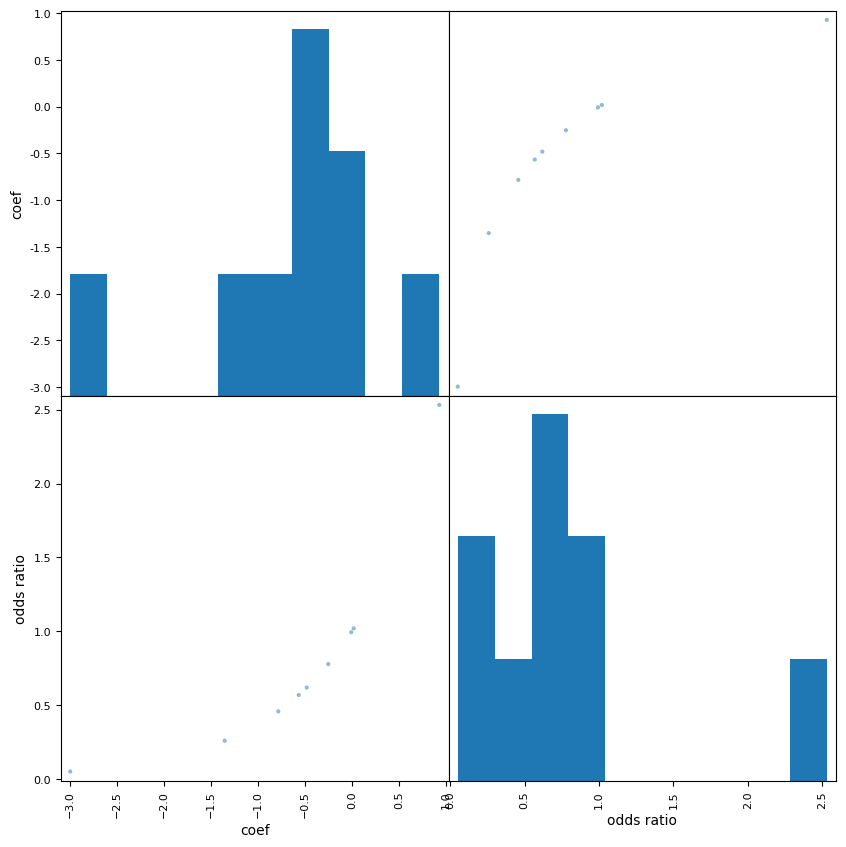

In [154]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(coefs,figsize=(10,10))
plt.show()

In [148]:
# ... Define and fit model

odds_ratios = pd.DataFrame( {"OR": results.params, "Lower CI": results.conf_int()[0], "Upper CI": results.conf_int()[1], })
odds_ratios = np.exp(odds_ratios)

print(odds_ratios)

                           OR  Lower CI  Upper CI
Intercept            0.100577  0.081539  0.124060
C(SEX)[T.2]          0.394924  0.270780  0.575984
C(AGE_4_GROUP)[T.2]  0.974368  0.749989  1.265877
C(AGE_4_GROUP)[T.3]  0.981147  0.750437  1.282784
C(AGE_4_GROUP)[T.4]  0.607041  0.442729  0.832334
C(AGE_4_GROUP)[T.5]  0.448666  0.318075  0.632872
C(LOS_3_GROUP)[T.2]  1.285851  1.029916  1.605386
C(LOS_3_GROUP)[T.3]  0.730673  0.559024  0.955027
C(LOS_3_GROUP)[T.4]  0.332646  0.214973  0.514731


In [149]:
model = smf.logit("heat_stroke ~ C(SEX, Treatment(2)) + C(AGE_4_GROUP, Treatment(3)) + C(LOS_3_GROUP, Treatment(2)) ", data=heat_trainner)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.228963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            heat_stroke   No. Observations:                 7255
Model:                          Logit   Df Residuals:                     7246
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Aug 2023   Pseudo R-squ.:                 0.03532
Time:                        14:44:52   Log-Likelihood:                -1661.1
converged:                       True   LL-Null:                       -1721.9
Covariance Type:            nonrobust   LLR p-value:                 1.516e-22
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.9935      0.217    -13.782      0.000      -3.419      -2.568
C(SEX, Treatment(2))[T.1]             0.9291      0.193      4.825      0.000       0.552       1.306
C(AGE_4_GROUP, Treatment(3))[T.1]     0.0190      0.137      0.139      0.889      -0.249       0.287
C(AGE_4_GROUP, Treatment(3))[T.2]    -0.0069      0.139     -0.050      0.960      -0.280       0.266
C(AGE_4_GROUP, Treatment(3))[T.4]    -0.4801      0.166     -2.896      0.004      -0.805      -0.155
C(AGE_4_GROUP, Treatment(3))[T.5]    -0.7824      0.180     -4.352      0.000      -1.135      -0.430
C(LOS_3_GROUP, Treatment(2))[T.1]    -0.2514      0.113     -2.220      0.026      -0.473      -0.029
C(LOS_3_GROUP, Treatment(2))[T.3]    -0.5652      0.147     -3.834      0.000      -0.854      -0.276
C(LOS_3_GROUP, Treatment(2))[T.4]    -1.3521      0.230     -5.885      0.000      -1.802      -0.902
=====================================================================================================
"""

In [162]:
heat_trainner2 = heat_trainner1.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(heat_trainner2).toarray()

In [163]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(
features, labels, test_size=0.20, random_state=0)

NameError: name 'labels' is not defined

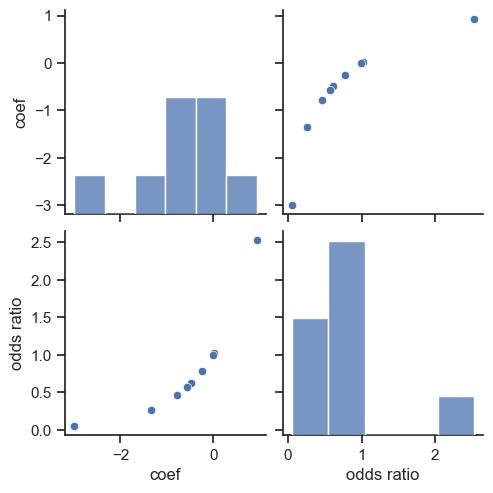

In [156]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
#dfiris = sns.load_dataset("iris")
sns.pairplot(coefs, )